
## EDA




In [1]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/sc1_project/vgames2.csv') # 데이터 불러오기
#pd.set_option('display.max_rows', len(df)) 전체 데이터 불러오기
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


# EDA
### 데이터 단위, 년도 통일

In [2]:
# Sale 전체 값 단위 M으로 통일. 값에 K가 있으면 K를 제거하고 1000으로 나누어주고, 값에 M이 있으면 M을 제거. 모든 값은 M 단위

df['NA_Sales'] = df['NA_Sales'].apply(lambda x: float(x.replace('K',''))/1000 if 'K' in x else x.replace('M','') if 'M' in x else x)
df['EU_Sales'] = df['EU_Sales'].apply(lambda x: float(x.replace('K',''))/1000 if 'K' in x else x.replace('M','') if 'M' in x else x)
df['JP_Sales'] = df['JP_Sales'].apply(lambda x: float(x.replace('K',''))/1000 if 'K' in x else x.replace('M','') if 'M' in x else x)
df['Other_Sales'] = df['Other_Sales'].apply(lambda x: float(x.replace('K',''))/1000 if 'K' in x else x.replace('M','') if 'M' in x else x)

# Year 년도 통일 - x가 50보다 크고 100보다 작으면 1900을, x가 22보다 작으면 2000을 더해주어 두자리 숫자로 되어있는 년도 통일
df['Year'] = df['Year'].apply(lambda x: 1900+x if 50<x<100 else 2000+x if 0<x<22 else x)


In [3]:
# 확인
df['Year'][1364]

2006.0

In [4]:
# 값이 들어있는 Column의 데이터 타입을 object에서 float로 계산 가능하게 바꿈

df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']] = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].astype(float)

print(df.dtypes)

Unnamed: 0       int64
Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object


In [5]:
# 원래 데이터에 있던 인덱스 제거

df = df.drop(df.columns[0:1], axis=1)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04


----



# **1. 지역에 따라 선호하는 장르**





In [6]:
# 지역에 따라 선호하는 장르가 다를까?

# groupby로 지역마다 장르별로 나누어줌
genre_na = df.groupby('Genre')['NA_Sales'].nunique() # nunique: 각각의 엘리먼트의 개수 리턴
genre_eu = df.groupby('Genre')['EU_Sales'].nunique()
genre_jp = df.groupby('Genre')['JP_Sales'].nunique()
genre_other = df.groupby('Genre')['Other_Sales'].nunique()

df_genre = pd.DataFrame([genre_na,genre_eu, genre_jp, genre_other]) # 지역 _ 장르별로 나누어준 group들을 하나의 데이터프레임화 
df_genre

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,220,78,129,158,175,83,155,144,199,117,190,72
EU_Sales,170,65,85,117,120,60,125,105,152,93,139,55
JP_Sales,93,50,77,84,101,68,65,149,55,70,91,65
Other_Sales,86,29,46,64,56,27,62,60,83,39,78,21


In [7]:
genre = ['Action','Adventure','Fighting','Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation','Sports','Strategy']

In [8]:
# 지역별로 Top Sales Genre 5개 선정

genre_na5 = genre_na.nlargest(5)
genre_eu5 = genre_eu.nlargest(5)
genre_jp5 = genre_jp.nlargest(5)
genre_other5 = genre_other.nlargest(5)

df_genre5 = pd.DataFrame([genre_na5,genre_eu5, genre_jp5, genre_other5])
df_genre5

,Action,Shooter,Sports,Platform,Misc,Racing,Role-Playing
NA_Sales,220.0,199.0,190.0,175.0,158.0,NaN,NaN
EU_Sales,170.0,152.0,139.0,120.0,NaN,125.0,NaN
JP_Sales,93.0,NaN,91.0,101.0,84.0,NaN,149.0
Other_Sales,86.0,83.0,78.0,NaN,64.0,62.0,NaN


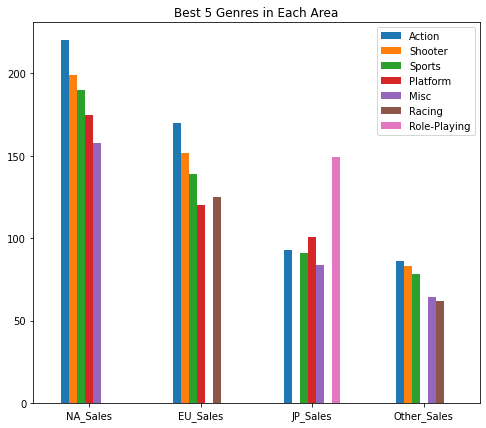

In [9]:
# 시각화

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.rcParams["figure.figsize"] = (8, 7)
df_genre5.plot.bar(title='Best 5 Genres in Each Area') 
plt.xticks(rotation=0) # xlabel이 세로로 되어있어 가로로 변경
plt.legend(loc='best')
plt.show()

### 일본에서 Role-Playing 게임이, 그 외 지역은 모두 Action 게임이 제일 인기가 많았다.




# **2. 연도별로 게임의 트렌드가 있을까?**





In [39]:
# 연도에 따라 게임의 장르의 유행이 바뀌는지 알아봄

trend_year = pd.DataFrame(df.groupby(['Year','Genre']).size().unstack()) # year, genre 두 개의 column을 그룹화함 _ unstack으로 데이터 풀어보기
trend_year = trend_year[1:] # 0 데이터 제거
trend_year.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980.0,1.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1981.0,25.0,NaN,NaN,NaN,3.0,2.0,1.0,NaN,10.0,1.0,4.0,NaN
1982.0,18.0,NaN,NaN,1.0,5.0,3.0,2.0,NaN,5.0,NaN,2.0,NaN
1983.0,7.0,1.0,NaN,1.0,5.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN
1984.0,1.0,NaN,NaN,1.0,1.0,3.0,3.0,NaN,3.0,NaN,2.0,NaN


In [11]:
trend_year.shape

(39, 12)

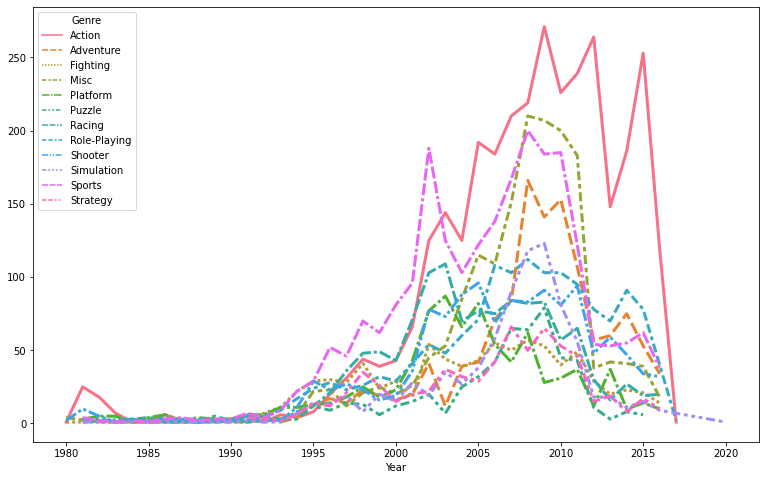

In [12]:
# 연도별로 유행한 게임을 알아봄

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 8))
sns.lineplot(data=trend_year[genre], linewidth=3)


### 'Action' 게임이 2005년 이후 계속 1위를 차지했으며, 계속되는 트렌드로 자리잡았다.
###  'Misc', 'Strategy'가 2000년대에 초중반까지 유행했으며, 
### 2010년도 이후엔 'Shooter' 게임이 2위로 유행하고 있다.

# 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

### 1) 출고량 상위권의 게임 분석


In [13]:
# 출고량이 높은 게임 모아줌 

cols = ['NA_Sales', 'EU_Sales','JP_Sales','Other_Sales']

# Sales 컬럼들을 다 더해서 출고량 합하기
df_sale = df.drop(df.columns[5:9], axis=1)
df_sale['Total_Sales'] = df[cols].sum(axis=1)

# 출고량 많은 순서대로 정렬
df_sale = df_sale.sort_values(by=['Total_Sales'], ascending=False)
df_sale = df_sale.reset_index(drop=True) # 인덱스 초기화
df_sale 

,Name,Platform,Year,Genre,Publisher,Total_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.83
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.38
...,...,...,...,...,...,...
16593,Spider-Man: Friend or Foe,PC,2007.0,Action,Activision,0.01
16594,Bejeweled Blitz,PC,2010.0,Puzzle,Mastertronic,0.01
16595,Sea Monsters: A Prehistoric Adventure,DS,2007.0,Adventure,DSI Games,0.01
16596,thinkSMART: Chess for Kids,DS,2011.0,Misc,Mentor Interactive,0.01


In [14]:
# 출고량 상위 20개의 데이터 

df_saletop20 = pd.DataFrame(df_sale.nlargest(20,['Total_Sales']))
df_saletop20


,Name,Platform,Year,Genre,Publisher,Total_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.83
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.38
5,Tetris,GB,1989.0,Puzzle,Nintendo,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,30.01
7,Wii Play,Wii,2006.0,Misc,Nintendo,29.01
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,28.61
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,28.31


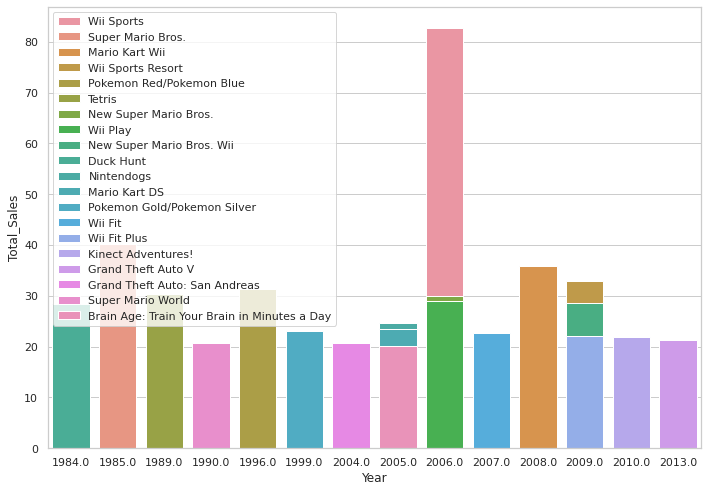

In [15]:
# 출고량 많은 상위 20게임 연도별로 시각화

plt.figure(figsize=(10,7))
sns.set_theme(style="whitegrid")
sns.barplot(data=df_saletop20, x='Year', y='Total_Sales', hue='Name',dodge=False)
plt.legend(loc='upper left')

plt.tight_layout()


# 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

### 2) Platform 으로 분석해보기


In [16]:
# Platform 으로 분석해보기

platform_sale = pd.DataFrame(df_saletop20.groupby('Platform').sum()) # 값들 더해줌
platform_sale = platform_sale.drop(platform_sale.columns[0], axis=1)

platform_sale = platform_sale.reset_index() # 인덱스 넣어줌
platform_sale


,Platform,Total_Sales
0,DS,98.41
1,GB,84.73
2,NES,68.55
3,PS2,20.81
4,PS3,21.39
5,SNES,20.62
6,Wii,253.91
7,X360,21.82


# 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

### 2) 'Platform' 으로 분석 - 시각화




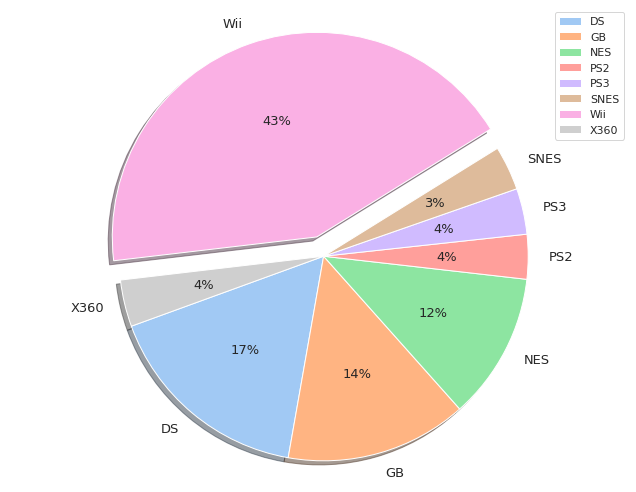

<Figure size 576x504 with 0 Axes>

In [17]:
# 출고량이 높은 20개의 게임 중 "플랫폼"에 따른 분석 시각화

explode = (0, 0, 0, 0, 0, 0, 0.1, 0) # 가장 많은 파이 잘라줌
colors = sns.color_palette('pastel')[0:8] # 파스텔 컬러로 나타냄
fig1, ax1 = plt.subplots(figsize = (9,7)) 

label_platform = platform_sale['Platform']
ax1.pie(platform_sale['Total_Sales'], explode=explode, labels = label_platform, colors = colors, shadow = True, startangle=200, autopct='%.0f%%',
        textprops={'fontsize': 13})
plt.legend(label_platform, loc='upper right')
plt.tight_layout()
ax1.axis('equal')

plt.figure()
plt.show()

### 출고량 상위 20개의 게임에서 'Wii' 플랫폼이 43%로 가장 많았다.
### 출고량을 플랫폼 분야로 분석했을 때,
### 다음 분기 게임 플랫폼으로는 'Wii' 이 적합해 보인다.


# 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

### 3) 'Genre' 로 분석



In [18]:

genre_sale = pd.DataFrame(df_saletop20.groupby('Genre').sum())
genre_sale = genre_sale.drop(genre_sale.columns[0], axis=1)

genre_sale = genre_sale.reset_index() 
genre_sale

,Genre,Total_Sales
0,Action,42.20
1,Misc,71.05
2,Platform,119.48
3,Puzzle,30.26
4,Racing,59.26
5,Role-Playing,54.47
6,Shooter,28.31
7,Simulation,24.75
8,Sports,160.46


# 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

### 3) 'Genre' 로 분석 - 시각화



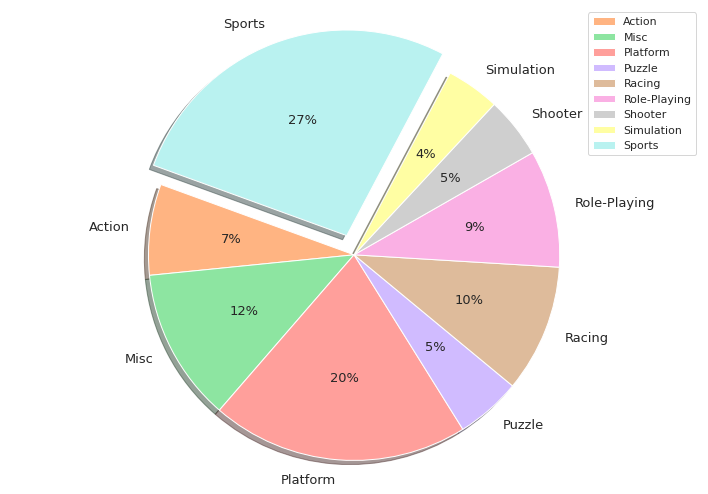

<Figure size 576x504 with 0 Axes>

<Figure size 576x504 with 0 Axes>

In [19]:
# 출고량이 높은 20개의 게임 중 "장르"에 따른 분석 시각화

explode = (0, 0, 0, 0, 0, 0, 0, 0, 0.1) # 가장 많은 파이 잘라줌
colors = sns.color_palette('pastel')[1:10] # 파스텔 컬러로 나타냄
fig1, ax1 = plt.subplots(figsize = (10,7)) 

label_genre = genre_sale['Genre']
ax1.pie(genre_sale['Total_Sales'], explode=explode, labels = label_genre, colors = colors, shadow = True, startangle=160, autopct='%.0f%%',
        textprops={'fontsize': 13})
plt.legend(label_genre, loc='upper right')
plt.tight_layout()
ax1.axis('equal')

plt.figure()
plt.show()

plt.savefig('genre_sale.png', dpi=300)

### 출고량 상위 20개의 게임에서 'Sport' 장르 27%로 1위에 있다.
### 2위로는 'Platform' 장르 20%로 2위에 있다.
### 출고량을 장르분야로 분석했을 때,
### 다음 분기 게임 장르로는 'Sport', 'Platform' 이 적합해 보인다.

# 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

### 4) 해당 연도에 유행하는 게임이어서 출고량이 높은 것은 아닐까?


In [20]:
genre_trend = pd.DataFrame(df.groupby(['Year','Genre']).size()) # 연도별로 장르마다 몇 개의 게임이 나왔는지 확인
genre_trend = genre_trend.reset_index() # '출고량 상위 20퍼_장르' 와 비교하기 위해 인덱스 초기화하여 나누어줌
genre_trend = genre_trend[3:] # 년도 0 지워줌

genre_trend = genre_trend.rename(columns={0: 'Count'})

genre_trend

,Year,Genre,Count
3,1980.0,Action,1
4,1980.0,Fighting,1
5,1980.0,Misc,4
6,1980.0,Shooter,2
7,1981.0,Action,25
...,...,...,...
386,2016.0,Sports,38
387,2016.0,Strategy,10
388,2017.0,Action,1
389,2017.0,Role-Playing,2


# 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

### 4) 해당 연도에 유행하는 게임이어서 출고량이 높은 것은 아닐까?

#### - Genre별 높은 출고량 상위 3 게임 & 출고량 높은 상위 20게임과의 비교


In [21]:
# Column 학인

print('genre_sale columns =',genre_sale.columns)
print('genre_trend columns =',genre_trend.columns)

genre_sale columns = Index(['Genre', 'Total_Sales'], dtype='object')
genre_trend columns = Index(['Year', 'Genre', 'Count'], dtype='object')


In [22]:
# 장르를 기준으로 출고량 많은 게임과, 장르별 유행한 게임을 합쳐줌

left = genre_sale
right = genre_trend

genre_merged = pd.merge(left,right, on='Genre', how='inner')
genre_merged = genre_merged.drop(genre_merged.columns[1],axis=1) # genre_merged[Total_Sales] drop
genre_merged

,Genre,Year,Count
0,Action,1980.0,1
1,Action,1981.0,25
2,Action,1982.0,18
3,Action,1983.0,7
4,Action,1984.0,1
...,...,...,...
300,Sports,2012.0,54
301,Sports,2013.0,53
302,Sports,2014.0,55
303,Sports,2015.0,62


In [23]:
# 각 장르마다 최고출고량 1개씩 뽑음

genre_merged = genre_merged.sort_values(['Genre','Count']).groupby('Genre').tail(1)
genre_merged

,Genre,Year,Count
29,Action,2009.0,271
60,Misc,2008.0,210
91,Platform,2003.0,87
131,Puzzle,2009.0,79
156,Racing,2003.0,109
192,Role-Playing,2008.0,112
226,Shooter,2005.0,96
260,Simulation,2009.0,123
296,Sports,2008.0,200


각 게임마다 출고량이 높은 연도 그래프


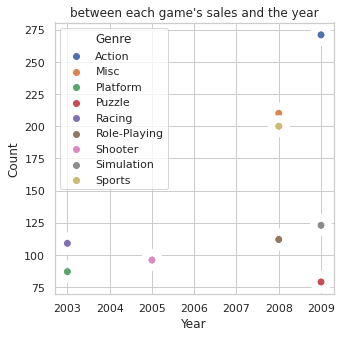

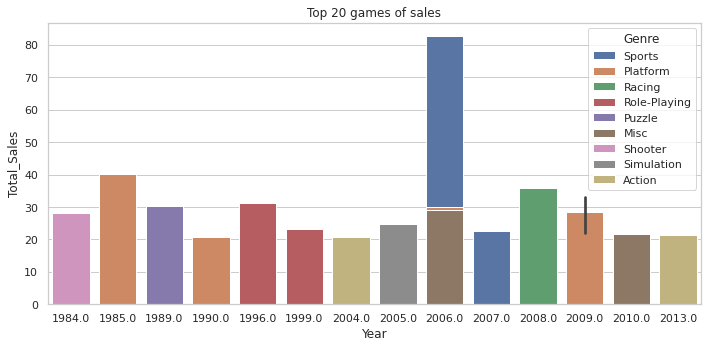

In [24]:

# 각 게임마다 3개씩 출고량이 높은 연도 그래프
plt.figure(figsize=(5,5))
sns.scatterplot(x='Year', y='Count', hue='Genre', linewidth=15, s=50,data=genre_merged)
plt.title('between each game\'s sales and the year')
print('각 게임마다 출고량이 높은 연도 그래프')
plt.show()

# 출고량 상위 20게임의 연도
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
plt.title('Top 20 games of sales')
sns.barplot(data=df_saletop20, x='Year', y='Total_Sales', hue='Genre',dodge=False)
#plt.legend(loc='upper left')
plt.tight_layout()



<Figure size 864x864 with 0 Axes>

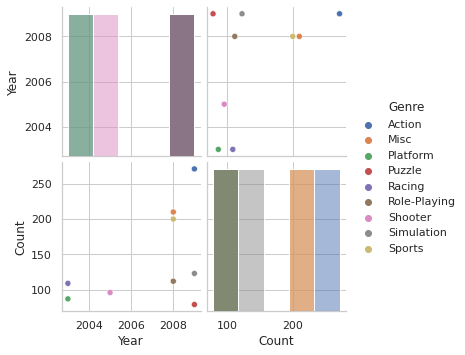

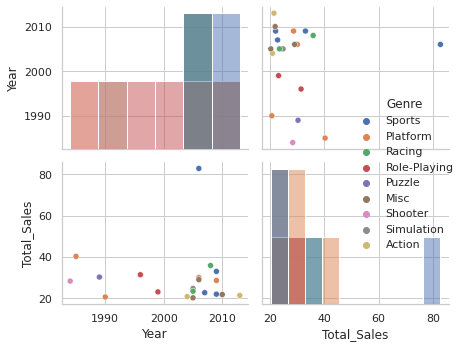

In [25]:
# Genre별 높은 출고량 상위 3 게임 & 출고량 높은 상위 20게임과의 비교 시각화

plt.figure(figsize=(12,12))
sns.set_theme(style="whitegrid")
sns.pairplot(data=genre_merged,hue='Genre',diag_kind="hist")
sns.pairplot(data=df_saletop20,hue='Genre',diag_kind="hist")
plt.tight_layout()


### 위 플랏과 아래의 플랏 'Genre'를 비교하여 봤을 때, 상관관계가 있어보인다.



# 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

### 5) 'Publisher' 로 분석



In [26]:
# publisher를 기준으로 데이터 그룹화

publ_sale = pd.DataFrame(df_saletop20.groupby('Publisher').sum())
publ_sale = publ_sale.drop(publ_sale.columns[0], axis=1)

publ_sale = publ_sale.reset_index() 
publ_sale

,Publisher,Total_Sales
0,Microsoft Game Studios,21.82
1,Nintendo,526.22
2,Take-Two Interactive,42.20


# 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

### 5) 'Publisher' 로 분석 - 시각화



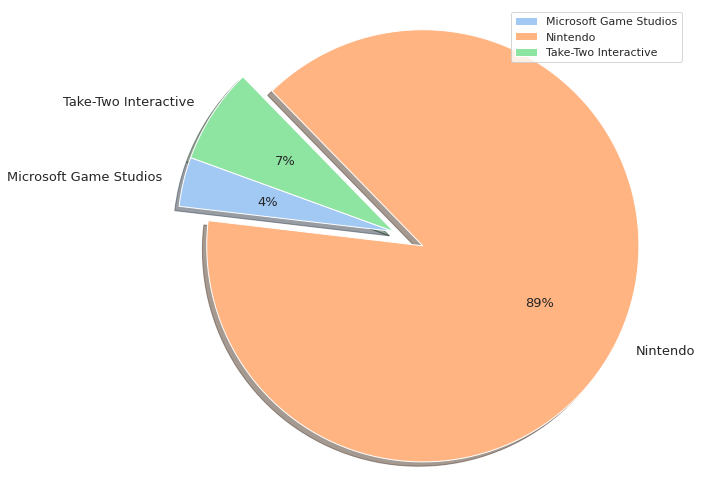

<Figure size 576x504 with 0 Axes>

In [27]:
# 출고량이 높은 20개의 게임 중 "Publisher"에 따른 분석 시각화 (1)

explode = (0, 0.15 ,0) # 가장 많은 파이 잘라줌
colors = sns.color_palette('pastel')[0:3] # 파스텔 컬러로 나타냄
fig1, ax1 = plt.subplots(figsize = (9,7)) 

label_publ = publ_sale['Publisher']
ax1.pie(publ_sale['Total_Sales'], explode=explode, labels = label_publ, colors = colors, shadow = True, startangle=160, autopct='%.0f%%',
        textprops={'fontsize': 13})
plt.legend(label_publ, loc='upper right')
plt.tight_layout()
ax1.axis('equal')

plt.figure()
plt.show()


### 출고량 상위 20개의 게임에서 'Nintendo'가 퍼블리셔 89%로 압도적 1위에 있다.
### 출고량을 'Publisher' 분야로 분석했을 때,
### 다음 분기 게임 퍼블리셔로는 'Nintendo'가 적합해 보인다.

# 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

### 6) 시리즈 게임이 차후 게임 출고에 영향을 미칠까?




In [28]:
# 시리즈 게임 알아보기
# 출고량 많은 상위 100 게임 중 시리즈가 얼마나 되는지 살펴보기

# 데이터프레임의 전체 데이터 확인

df_sale.head()
df_saletop100 = df_sale[:101]

#pd.set_option('display.max_rows', len(df_saletop100)) # 데이터프레임의 전체 데이터 확인
df_saletop100



,Name,Platform,Year,Genre,Publisher,Total_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.83
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.38
...,...,...,...,...,...,...
96,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,7.46
97,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,7.44
98,Call of Duty: World at War,X360,2008.0,Shooter,Activision,7.38
99,Battlefield 3,X360,2011.0,Shooter,Electronic Arts,7.34


### 유의미한 시리즈 데이터들의 연관성 찾기

,Name,Platform,Year,Genre,Publisher,Total_Sales
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,14.76
30,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,14.64
33,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,14.24
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,14.04
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,13.74
36,Call of Duty: Modern Warfare 2,X360,2009.0,Shooter,Activision,13.52
37,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,13.47
40,Call of Duty: Black Ops,PS3,2010.0,Shooter,Activision,12.73
55,Call of Duty: Modern Warfare 2,PS3,2009.0,Shooter,Activision,10.69
61,Call of Duty: Ghosts,X360,2013.0,Shooter,Activision,10.21


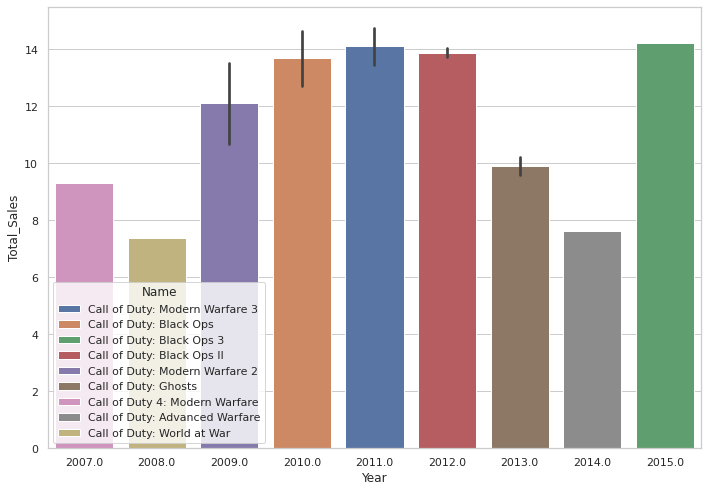

In [29]:
# Call of Duty 시리즈 간의 상관관계

df_call = df_saletop100[df_saletop100['Name'].str.contains('Call')]

plt.figure(figsize=(10,7))
sns.set_theme(style="whitegrid")
sns.barplot(data=df_call,x='Year', y='Total_Sales', hue='Name',dodge=False)
plt.tight_layout()
df_call


In [30]:
df_call2 = pd.DataFrame(df_call.groupby(['Total_Sales','Platform']).sum()) # 연도별로 장르마다 몇 개의 게임이 나왔는지 확인
df_call2 = df_call2.sort_values(by=['Year'])
df_call


,Name,Platform,Year,Genre,Publisher,Total_Sales
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,14.76
30,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,14.64
33,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,14.24
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,14.04
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,13.74
36,Call of Duty: Modern Warfare 2,X360,2009.0,Shooter,Activision,13.52
37,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,13.47
40,Call of Duty: Black Ops,PS3,2010.0,Shooter,Activision,12.73
55,Call of Duty: Modern Warfare 2,PS3,2009.0,Shooter,Activision,10.69
61,Call of Duty: Ghosts,X360,2013.0,Shooter,Activision,10.21


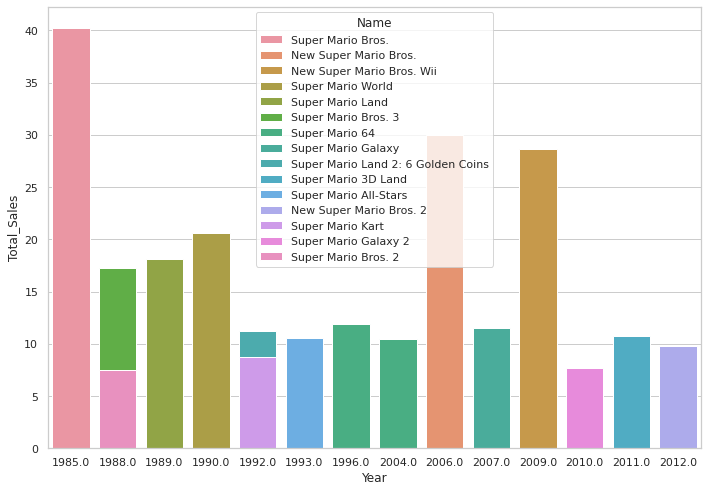

,Name,Platform,Year,Genre,Publisher,Total_Sales
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,30.01
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,28.61
18,Super Mario World,SNES,1990.0,Platform,Nintendo,20.62
21,Super Mario Land,GB,1989.0,Platform,Nintendo,18.14
22,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,17.28
45,Super Mario 64,N64,1996.0,Platform,Nintendo,11.90
48,Super Mario Galaxy,Wii,2007.0,Platform,Nintendo,11.52
50,Super Mario Land 2: 6 Golden Coins,GB,1992.0,Adventure,Nintendo,11.18
53,Super Mario 3D Land,3DS,2011.0,Platform,Nintendo,10.79


In [31]:
# 마리오 시리즈 간의 상관관계

df_mario = df_saletop100[df_saletop100['Name'].str.contains('Super Mario')]

# Sales, Year
plt.figure(figsize=(10,7))
sns.set_theme(style="whitegrid")
sns.barplot(data=df_mario,x='Year', y='Total_Sales', hue='Name',dodge=False)
plt.tight_layout()
plt.show()
df_mario


In [32]:

df_mario2 = pd.DataFrame(df_mario.groupby(['Total_Sales','Platform']).sum()) 
df_mario2 = df_mario2.sort_values(by=['Year'])
df_mario2


,,Year
Total_Sales,Platform,
40.24,NES,1985.0
7.46,NES,1988.0
17.28,NES,1988.0
18.14,GB,1989.0
20.62,SNES,1990.0
8.77,SNES,1992.0
11.18,GB,1992.0
10.55,SNES,1993.0
11.90,N64,1996.0


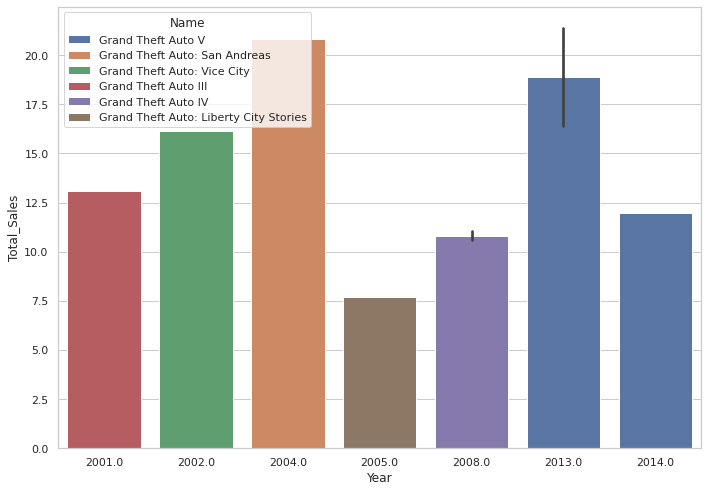

,Name,Platform,Year,Genre,Publisher,Total_Sales
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,21.39
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,20.81
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,16.38
24,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,16.15
38,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,13.10
44,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,11.99
51,Grand Theft Auto IV,X360,2008.0,Action,Take-Two Interactive,11.03
56,Grand Theft Auto IV,PS3,2008.0,Action,Take-Two Interactive,10.58
90,Grand Theft Auto: Liberty City Stories,PSP,2005.0,Action,Take-Two Interactive,7.72


In [33]:
# Grand Theft 시리즈의 상관관계

df_grand = df_saletop100[df_saletop100['Name'].str.contains('Grand')]

plt.figure(figsize=(10,7))
sns.set_theme(style="whitegrid")
sns.barplot(data=df_grand,x='Year', y='Total_Sales', hue='Name',dodge=False)
plt.tight_layout()
plt.show()
df_grand

### 각 데이터들의 그래프와 데이터 변화를 살펴보면
### 시리즈 간의 통일성, 연관성은 없어보인다.

### 그렇다면 시리즈화된 게임들 간의 상관관계가 있는지 확인해보자. (ANOVA test)







# 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

### 7) 가설: 시리즈화 된 게임들은 상관관계가 있다


In [34]:
# 시리즈 게임 간의 연관성 찾기

from functools import reduce

series_mario = df_mario[['Year','Total_Sales']] 
series_call = df_call[['Year','Total_Sales']]
series_grand = df_grand[['Year','Total_Sales']]

dat_series = [series_mario, series_call, series_grand]
dat_series = reduce(lambda  left,right: pd.merge(left,right,on=['Year'],how='outer'), dat_series) # 년도별로 각 시리즈 그룹화해줌
dat_series = dat_series.rename(columns={'Total_Sales_x': 'Mario', 'Total_Sales_y': 'Call', 'Total_Sales':'Grand'})
dat_series = dat_series.fillna(0) # 결측치 제거 - 어떻게 해도 결측치가 남아 오류를 만드므로 0으로 채워줌
dat_series.reset_index()
year = dat_series['Year']
dat_series2 = dat_series.drop(dat_series.columns[0], axis=1)
dat_series2


,Mario,Call,Grand
0,40.24,0.00,0.00
1,30.01,0.00,0.00
2,28.61,13.52,0.00
3,28.61,10.69,0.00
4,20.62,0.00,0.00
5,18.14,0.00,0.00
6,17.28,0.00,0.00
7,7.46,0.00,0.00
8,11.90,0.00,0.00
9,11.52,9.32,0.00


In [35]:
# 세 시리즈 데이터의 상관관계를 보기 위해 PCA로 데이터 노말라이즈 해줌

import pandas as pd
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA


scaler = StandardScaler() # 다른 데이터들을 비교 가능하게 만들어줌
features = pd.DataFrame(scaler.fit_transform(dat_series2),columns=['Mario','Call','Grand']) # 노말라이즈된 데이터 얻음
print('\n Standardized features=', features)

pca = PCA(n_components=2) # 2차원으로 축소 PCA 실행
pc_series = pd.DataFrame(pca.fit_transform(features), columns=['PC1','PC2']) # PCA 시행하여 변환된 주성분으로 데이터 프레임 생성

pc_series.head()


 Standardized features=        Mario      Call     Grand
0   2.895552 -1.043632 -0.696012
1   1.913963 -1.043632 -0.696012
2   1.779630  1.221553 -0.696012
3   1.779630  0.747405 -0.696012
4   1.012974 -1.043632 -0.696012
5   0.775013 -1.043632 -0.696012
6   0.692495 -1.043632 -0.696012
7  -0.249754 -1.043632 -0.696012
8   0.176273 -1.043632 -0.696012
9   0.139811  0.517871 -0.696012
10  0.107188 -1.043632 -0.696012
11 -0.124057 -1.043632 -0.696012
12  0.069766  1.429306 -0.696012
13  0.069766  1.213175 -0.696012
14  0.046738 -1.043632 -0.696012
15  0.034264 -1.043632  1.993924
16 -0.022348  1.308675 -0.696012
17 -0.022348  1.258412 -0.696012
18 -0.226725  1.409201 -0.696012
19 -0.226725  1.089193 -0.696012
20 -0.965555  1.342184 -0.696012
21 -0.965555  0.666984  2.068896
22 -0.965555  0.666984  1.421295
23 -0.965555  0.561432  2.068896
24 -0.965555  0.561432  1.421295
25 -0.965555  0.231372  0.853836
26 -0.965555  0.192837  0.729745
27 -0.965555  0.192837  0.671577
28 -0.965555 -1.04

,PC1,PC2
0,2.723383,0.899834
1,2.025166,0.861709
2,1.513983,-1.303564
3,1.600982,-0.851422
4,1.384280,0.826714


In [36]:
new_series = pd.concat([pc_series,year], axis=1)
new_series = new_series.dropna()
new_series

,PC1,PC2,Year
0,2.723383,0.899834,1985.0
1,2.025166,0.861709,2006.0
2,1.513983,-1.303564,2009.0
3,1.600982,-0.851422,2009.0
4,1.384280,0.826714,1990.0
5,1.215016,0.817472,1989.0
6,1.156319,0.814267,1988.0
7,0.486085,0.777669,1988.0
8,0.789123,0.794216,1996.0
9,0.476673,-0.696232,2007.0


In [37]:
ratio = pca.explained_variance_ratio_ # variance ratio
ratio

array([0.53524438, 0.33886092])